In [1]:
import numpy as np
import tensorflow as tf
import mnist
from matplotlib import pyplot as plt



/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
x = tf.placeholder(tf.float32,[60000,28,28,1])
w = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [3]:
init = tf.initialize_all_variables()
y = tf.nn.softmax(tf.matmul(tf.reshape(x,[-1,784]),w)+b)
y_ = tf.placeholder(tf.float32,[60000,10])

cross_entropy = tf.reduce_sum(y_*tf.log(y))

optimizer = tf.train.GradientDescentOptimizer(0.003).minimize(cross_entropy)

session = tf.Session()

session.run(init)

from mnist import MNIST
mndata = MNIST('./python-mnist/data')
images, labels = mndata.load_training()




Instructions for updating:
Use `tf.global_variables_initializer` instead.


60000
784
(28, 28)
(60000, 28, 28, 1)


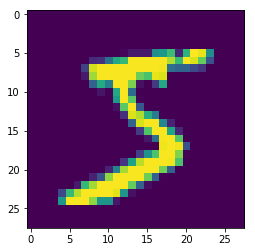

In [4]:
print(len(images))
print(len(images[0]))
k=np.reshape(images[0],(28,28))
print(np.shape(k))
plt.imshow(k)

newx = np.reshape(images,(60000,28,28,1))
print(np.shape(newx))

In [5]:
print(labels[0])
a = np.array(labels)
b = np.zeros((60000, 10))
b[np.arange(60000), a] = 1
print(b[0]) 

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:

for i in range(1000):
    #batch_x,batch_y = mnist.train.next_batch(100)
    train_data = {x:newx,y_:b}
    session.run(optimizer,feed_dict = train_data)
print(session.run(cross_entropy))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-765d09b0c4c7>", line 5, in <module>
    session.run(optimizer,feed_dict = train_data)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/client/session.py", line 905, in run
    run_metadata_ptr)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/client/session.py", line 1140, in _run
    feed_dict_tensor, options, run_metadata)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/client/session.py", line 1321, in _do_run
    run_metadata)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/client/session.py", line 1327, in _do_call
    return fn(*args)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/client/session.py", line 1312, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata

KeyboardInterrupt: 